<a href="https://colab.research.google.com/github/stxupengyu/LSTM-Long-Term-Prediction/blob/master/lstm_multi_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#挂载云盘 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#进入项目目录
print('original document')
!ls
import os
os.chdir('/content/drive/My Drive/colab/lstm')
print('current document')
!ls

original document
 2020年C题--面向康复工程的脑电信号分析和判别模型.docx
'~$20年C题--面向康复工程的脑电信号分析和判别模型.docx'
 C-1.ipynb
 data.rar
 unrar.ipynb
 附件1-P300脑机接口数据
 附件2-睡眠脑电数据.xlsx
current document
Data2.xlsx  lstm-multi-object.ipynb


In [32]:
#导入必须的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')#画图风格
np.random.seed(100)
window=12#时间窗
label_dim=10#标签纬度
amount_of_features=1#特征数量
d=0.05#dropout系数
batch_size=12#批训练数量
epoch=50#总迭代次数
train_file='Data2.xlsx'#读取训练集地址
show_num=100#展示训练集最后多少个数据点

In [33]:
#展示下读取的数据
data_origin=pd.read_excel(train_file,header=0) 
data_origin.head()

,Unnamed: 0,Unnamed: 1
0,5.311336,380.047791
1,5.672167,453.769196
2,5.216037,306.376587
3,5.659674,419.645905
4,5.577941,380.650696


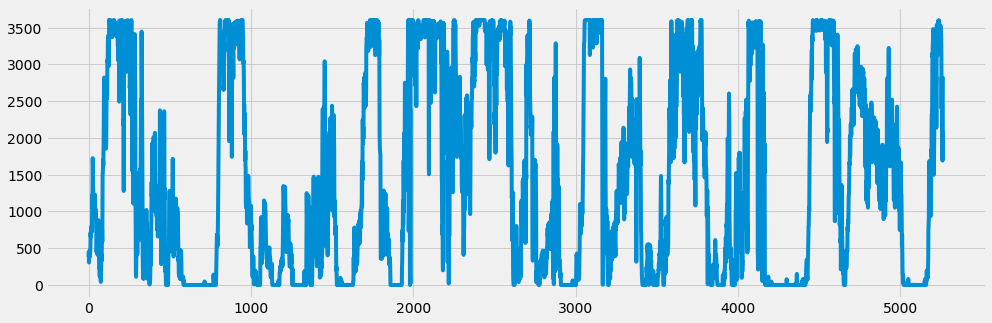

In [34]:
#画图看看
plt.figure(figsize=(15, 5))
plt.plot(data_origin.iloc[:-200,1])
plt.show()

In [35]:
#归一化
data=(data_origin-data_origin.min())/(data_origin.max()-data_origin.min())
#构造针对机器学习模型的数据集(特征和标签)
data=data.values
length=data.shape[0]
features_num=data.shape[1]
x=[]
y=[]
for i in range(length-window-label_dim):
    x.append(data[i:i+window,:])
    y.append(data[i+window:i+window+label_dim,-1])
x=np.array(x)
y=np.array(y)
print(x.shape,y.shape)

(5440, 12, 2) (5440, 10)


In [36]:
#划分训练集和测试集
x_train,x_test,y_train,y_test=x[:-1,:],x[-2:-1,:],y[:-1,:],y[-2:-1,:]
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5439, 12, 2) (1, 12, 2) (5439, 10) (1, 10)


In [37]:
#建立LSTM模型 训练
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Dropout
from keras.layers.recurrent import LSTM
#建立训练模型过程
model = Sequential()#建立层次模型
model.add(LSTM(label_dim, input_shape=(window, features_num), return_sequences=False))#建立LSTM层
#model.add(Dropout(d))
model.add(Dense(label_dim*2,activation='relu'))   #建立全连接层  
#model.add(Dropout(d))
model.add(Dense(label_dim,activation='relu'))
#编译模型
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 950
Trainable params: 950
Non-trainable params: 0
_________________________________________________________________


In [38]:
#神经网络训练及结果
history = model.fit(x_train, y_train, epochs =epoch, batch_size = batch_size,verbose=1,validation_split=0.1) #训练模型nb_epoch次

Epoch 1/50
408/408 [==============================] - 2s 5ms/step - loss: 0.1315 - accuracy: 0.1301 - val_loss: 0.0801 - val_accuracy: 0.1103
Epoch 2/50
408/408 [==============================] - 2s 4ms/step - loss: 0.1138 - accuracy: 0.1403 - val_loss: 0.0795 - val_accuracy: 0.1305
Epoch 3/50
408/408 [==============================] - 2s 4ms/step - loss: 0.1130 - accuracy: 0.1510 - val_loss: 0.0796 - val_accuracy: 0.1268
Epoch 4/50
408/408 [==============================] - 2s 4ms/step - loss: 0.1128 - accuracy: 0.1614 - val_loss: 0.0795 - val_accuracy: 0.1544
Epoch 5/50
408/408 [==============================] - 2s 4ms/step - loss: 0.1125 - accuracy: 0.1608 - val_loss: 0.0791 - val_accuracy: 0.1379
Epoch 6/50
408/408 [==============================] - 2s 4ms/step - loss: 0.1123 - accuracy: 0.1720 - val_loss: 0.0790 - val_accuracy: 0.1985
Epoch 7/50
408/408 [==============================] - 2s 4ms/step - loss: 0.1121 - accuracy: 0.1700 - val_loss: 0.0788 - val_accuracy: 0.1673
Epoch 

In [39]:
y_test_pred=model.predict(x_test)[0,:]
pred=y_test_pred*(data_origin.max()[1]-data_origin.min()[1])+data_origin.min()[1]#反归一化

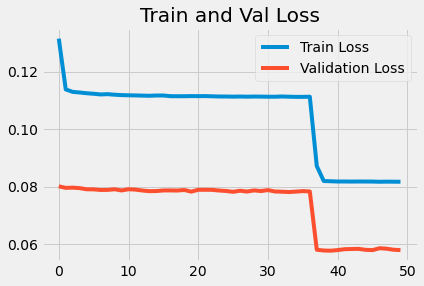

In [40]:
#迭代图像
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epoch)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()

[-2.471405 -2.471405 -2.471405 -2.471405 -2.471405 35.97091  36.61802
 29.347504 50.27569  63.21911 ]


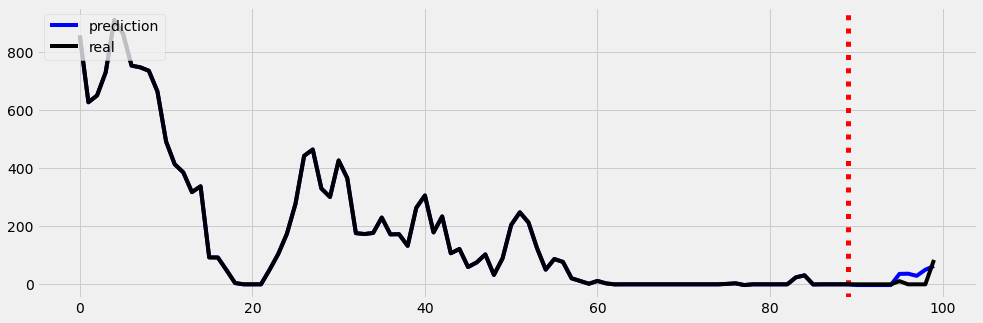

In [41]:
#画图
print(pred)
data_origin=data_origin.values
train=data_origin[-show_num:-label_dim,-1]
test=data_origin[-label_dim:,-1]
pred=np.hstack((train,pred))
real=np.hstack((train,test)) 
plt.figure(figsize=(15, 5))
plt.axvline(len(train)-1, linestyle="dotted", linewidth=5, color='r')
plt.plot(pred,label="prediction", color="b")
plt.plot(real,label="real", color="k")
plt.legend(loc="upper left")
plt.show()